# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count (623)
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 633


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [27]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}&units=metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        json_req = requests.get(city_url)
        city_weather = json_req.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | domazlice
Processing Record 2 of Set 1 | beringovskiy
Processing Record 3 of Set 1 | namibe
Processing Record 4 of Set 1 | anastacio
Processing Record 5 of Set 1 | mount gambier
Processing Record 6 of Set 1 | saint george
Processing Record 7 of Set 1 | tuktoyaktuk
Processing Record 8 of Set 1 | punta arenas
Processing Record 9 of Set 1 | east london
Processing Record 10 of Set 1 | yellowknife
Processing Record 11 of Set 1 | bluff
Processing Record 12 of Set 1 | stephenville
Processing Record 13 of Set 1 | puerto escondido
Processing Record 14 of Set 1 | san patricio
Processing Record 15 of Set 1 | busselton
Processing Record 16 of Set 1 | port alfred
Processing Record 17 of Set 1 | mataura
Processing Record 18 of Set 1 | nishihara
Processing Record 19 of Set 1 | manta
Processing Record 20 of Set 1 | vaini
Processing Record 21 of Set 1 | coahuayana
Processing Record 22 of Set 1 | geraldton
Process

Processing Record 37 of Set 4 | namatanai
Processing Record 38 of Set 4 | wajima
Processing Record 39 of Set 4 | lokosovo
Processing Record 40 of Set 4 | silyanah
City not found. Skipping...
Processing Record 41 of Set 4 | port-gentil
Processing Record 42 of Set 4 | springfield
Processing Record 43 of Set 4 | gubkin
Processing Record 44 of Set 4 | barcelos
Processing Record 45 of Set 4 | isla vista
Processing Record 46 of Set 4 | sur
Processing Record 47 of Set 4 | margate
Processing Record 48 of Set 4 | mayo
Processing Record 49 of Set 4 | preobrazheniye
Processing Record 0 of Set 5 | baghdad
Processing Record 1 of Set 5 | swarzedz
Processing Record 2 of Set 5 | lolua
City not found. Skipping...
Processing Record 3 of Set 5 | sorvag
City not found. Skipping...
Processing Record 4 of Set 5 | baykit
Processing Record 5 of Set 5 | grindavik
Processing Record 6 of Set 5 | shimoda
Processing Record 7 of Set 5 | nizhneyansk
City not found. Skipping...
Processing Record 8 of Set 5 | grande p

Processing Record 24 of Set 8 | upernavik
Processing Record 25 of Set 8 | svetlaya
Processing Record 26 of Set 8 | warqla
City not found. Skipping...
Processing Record 27 of Set 8 | marzuq
Processing Record 28 of Set 8 | westport
Processing Record 29 of Set 8 | phitsanulok
Processing Record 30 of Set 8 | mecca
Processing Record 31 of Set 8 | monrovia
Processing Record 32 of Set 8 | biak
Processing Record 33 of Set 8 | buenaventura
Processing Record 34 of Set 8 | ibirama
Processing Record 35 of Set 8 | korla
Processing Record 36 of Set 8 | muzhi
Processing Record 37 of Set 8 | parana
Processing Record 38 of Set 8 | la palma
Processing Record 39 of Set 8 | muros
Processing Record 40 of Set 8 | vaitupu
City not found. Skipping...
Processing Record 41 of Set 8 | qasigiannguit
Processing Record 42 of Set 8 | leander
Processing Record 43 of Set 8 | yongan
Processing Record 44 of Set 8 | ustynivka
Processing Record 45 of Set 8 | qaqortoq
Processing Record 46 of Set 8 | san roque
Processing Re

Processing Record 14 of Set 12 | iqaluit
Processing Record 15 of Set 12 | tabou
Processing Record 16 of Set 12 | mindelo
Processing Record 17 of Set 12 | cap malheureux
Processing Record 18 of Set 12 | kankon
Processing Record 19 of Set 12 | tupelo
Processing Record 20 of Set 12 | calvinia
Processing Record 21 of Set 12 | yablonovo
Processing Record 22 of Set 12 | byron bay
Processing Record 23 of Set 12 | kulhudhuffushi
Processing Record 24 of Set 12 | laguna
Processing Record 25 of Set 12 | kota kinabalu
Processing Record 26 of Set 12 | ambon
Processing Record 27 of Set 12 | bandarbeyla
Processing Record 28 of Set 12 | lyubinskiy
Processing Record 29 of Set 12 | ust-kut
Processing Record 30 of Set 12 | sagua la grande
Processing Record 31 of Set 12 | itarema
Processing Record 32 of Set 12 | iquitos
Processing Record 33 of Set 12 | maromitsa
Processing Record 34 of Set 12 | currais novos
Processing Record 35 of Set 12 | ocos
Processing Record 36 of Set 12 | san luis
Processing Record 

In [28]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          584
Lat           584
Lng           584
Max Temp      584
Humidity      584
Cloudiness    584
Wind Speed    584
Country       584
Date          584
dtype: int64

In [29]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,domazlice,49.4405,12.9298,2.97,98,100,7.00,CZ,1675222989
1,beringovskiy,63.0500,179.3167,-6.11,97,59,3.46,RU,1675222990
2,namibe,-15.1961,12.1522,21.92,82,100,2.35,AO,1675222991
3,anastacio,-20.4836,-55.8069,22.29,95,100,1.01,BR,1675222710
4,mount gambier,-37.8333,140.7667,18.06,41,91,4.16,AU,1675222992


In [30]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [31]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,domazlice,49.4405,12.9298,2.97,98,100,7.00,CZ,1675222989
1,beringovskiy,63.0500,179.3167,-6.11,97,59,3.46,RU,1675222990
2,namibe,-15.1961,12.1522,21.92,82,100,2.35,AO,1675222991
3,anastacio,-20.4836,-55.8069,22.29,95,100,1.01,BR,1675222710
4,mount gambier,-37.8333,140.7667,18.06,41,91,4.16,AU,1675222992


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

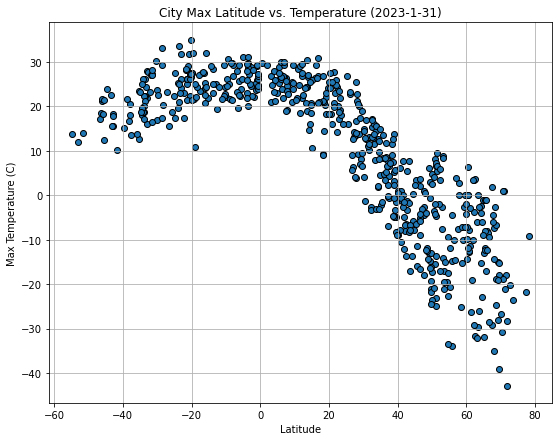

In [32]:
# Build scatter plot for latitude vs. temperature
plt.figure(figsize=(9,7))
plt.scatter(city_data_df["Lat"],city_data_df["Max Temp"], edgecolors = 'black')
plt.grid(visible=True)

plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("City Latitude vs. Max Temperature (2023-1-31)")

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

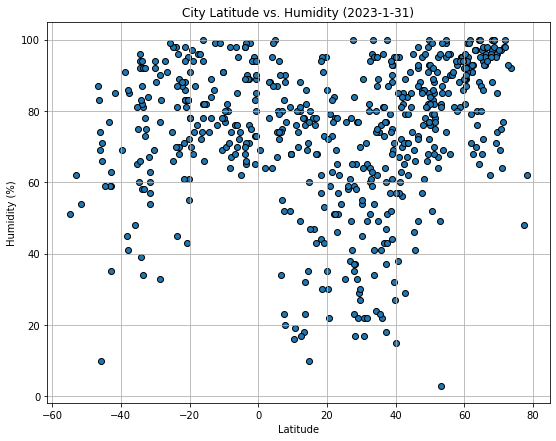

In [35]:
# Build the scatter plots for latitude vs. humidity
plt.figure(figsize=(9,7))
plt.scatter(city_data_df["Lat"],city_data_df["Humidity"], edgecolors = 'black')
plt.grid(visible=True)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity (2023-1-31)")

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

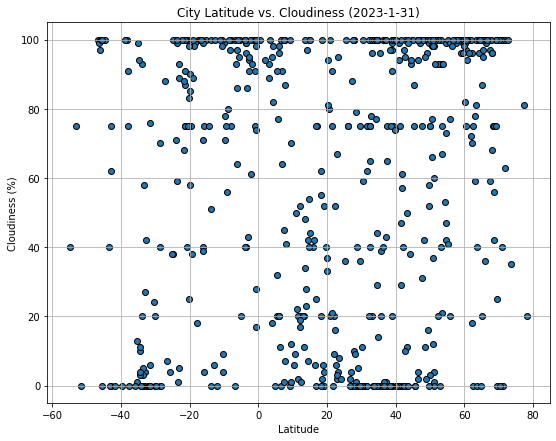

In [36]:
# Build the scatter plots for latitude vs. cloudiness
plt.figure(figsize=(9,7))
plt.scatter(city_data_df["Lat"],city_data_df["Cloudiness"], edgecolors = 'black')
plt.grid(visible=True)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness (2023-1-31)")

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

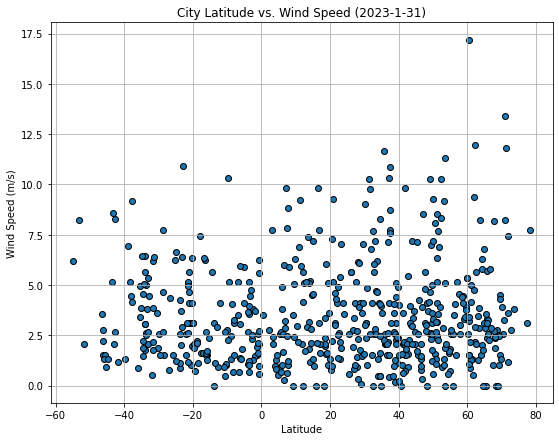

In [37]:
# Build the scatter plots for latitude vs. wind speed
plt.figure(figsize=(9,7))
plt.scatter(city_data_df["Lat"],city_data_df["Wind Speed"], edgecolors = 'black')
plt.grid(visible=True)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Latitude vs. Wind Speed (2023-1-31)")

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
y = slope*x + intercept

In [38]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,domazlice,49.4405,12.9298,2.97,98,100,7.00,CZ,1675222989
1,beringovskiy,63.0500,179.3167,-6.11,97,59,3.46,RU,1675222990
5,saint george,37.1041,-113.5841,-0.32,37,0,4.12,US,1675222772
6,tuktoyaktuk,69.4541,-133.0374,-39.00,74,0,1.54,CA,1675222993
9,yellowknife,62.4560,-114.3525,-31.71,68,0,5.66,CA,1675222811


In [39]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] <= 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,namibe,-15.1961,12.1522,21.92,82,100,2.35,AO,1675222991
3,anastacio,-20.4836,-55.8069,22.29,95,100,1.01,BR,1675222710
4,mount gambier,-37.8333,140.7667,18.06,41,91,4.16,AU,1675222992
7,punta arenas,-53.1500,-70.9167,12.06,62,75,8.23,CL,1675222993
8,east london,-33.0153,27.9116,21.95,78,4,2.06,ZA,1675222913


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8572718577554468


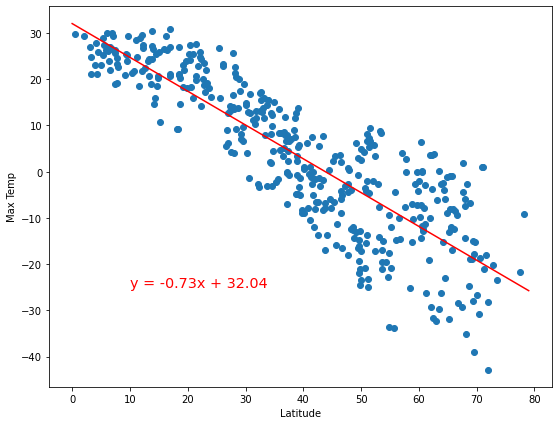

In [58]:
# Linear regression on Northern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemi_df["Lat"],
                                                           northern_hemi_df["Max Temp"])
x = np.arange(0,80)
y = slope*x + intercept
print("The r-value is: " + str(rvalue))
m = str(round(slope,2))

plt.figure(figsize=(9,7))
plt.plot(x,y,'-r')
plt.scatter(northern_hemi_df["Lat"],northern_hemi_df["Max Temp"])
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.text(10,-25, "y = " + m +"x + " + str(round(intercept, 2)), fontsize = "x-large", color = "r")
plt.show()

The r-value is: 0.5293036825838079


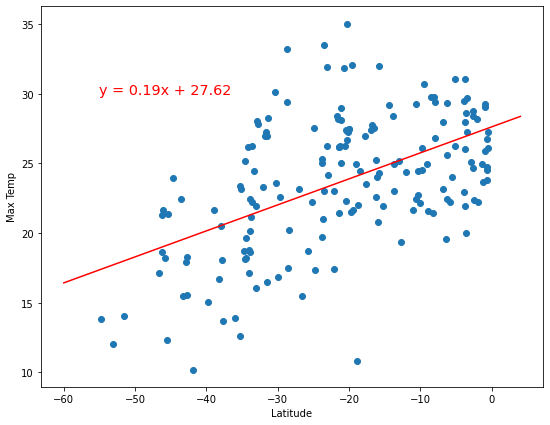

In [60]:
# Linear regression on Southern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemi_df["Lat"],
                                                           southern_hemi_df["Max Temp"])
x = np.arange(-60,0)
y = slope*x + intercept
print("The r-value is: " + str(rvalue))
m = str(round(slope,2))

plt.figure(figsize=(9,7))
plt.plot(x,y,'-r')
plt.scatter(southern_hemi_df["Lat"],southern_hemi_df["Max Temp"])
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.text(-55,30, "y = " + m +"x + " + str(round(intercept, 2)), fontsize = "x-large", color = "r")
plt.show()

**Discussion about the linear relationship:** Interestingly, there is stronger correlation in the cases concerning the Northern Hemisphere than there is in the Southern Hemisphere. This *could* make sense considering cities along the Southern Hemisphere are more sparse, there is less landmass in general in the Southern Hemisphere, and in our dataset the Southern Hemisphere makes up a smaller amount of data points compared to the Northern. Typically with less landmass - and without looking at oceanographic data - certain aspects of any Southern Hemisphere city's weather may have stronger relationships with sea currents and ocean temperatures than its latitude.
Also note the change in the sign of the correlation coefficient; weakly, the closer to the equator from either the Northern or the Southern hemisphere may generally make us expect higher temperatures at '0' latitude!

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.40439107223626325


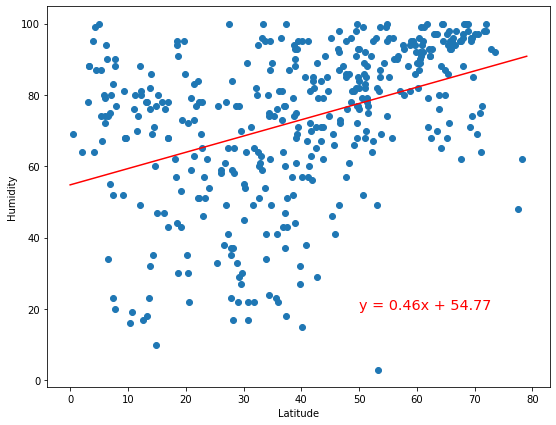

In [68]:
# Northern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemi_df["Lat"],
                                                           northern_hemi_df["Humidity"])
x = np.arange(0,80)
y = slope*x + intercept
print("The r-value is: " + str(rvalue))
m = str(round(slope,2))

plt.figure(figsize=(9,7))
plt.plot(x,y,'-r')
plt.scatter(northern_hemi_df["Lat"],northern_hemi_df["Humidity"])
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.text(50,20, "y = " + m +"x + " + str(round(intercept, 2)), fontsize = "x-large", color = "r")
plt.show()

The r-value is: 0.33940090019882635


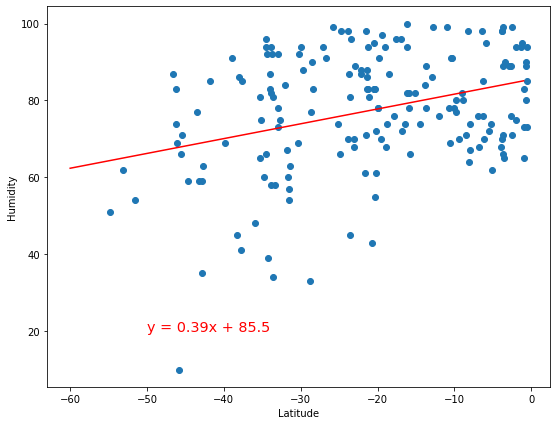

In [69]:
# Southern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemi_df["Lat"],
                                                           southern_hemi_df["Humidity"])
x = np.arange(-60,0)
y = slope*x + intercept
print("The r-value is: " + str(rvalue))
m = str(round(slope,2))

plt.figure(figsize=(9,7))
plt.plot(x,y,'-r')
plt.scatter(southern_hemi_df["Lat"],southern_hemi_df["Humidity"])
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.text(-50,20, "y = " + m +"x + " + str(round(intercept, 2)), fontsize = "x-large", color = "r")
plt.show()

**Discussion about the linear relationship:** 
There is a weaker correlation in general when concerned with the relationship between humidity and latitude compared to temperature and latitude. This makes sense as you think of all the possible climates around the globe - certainly deserts and tropics can exist at the same latitude!

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.30900239340708185


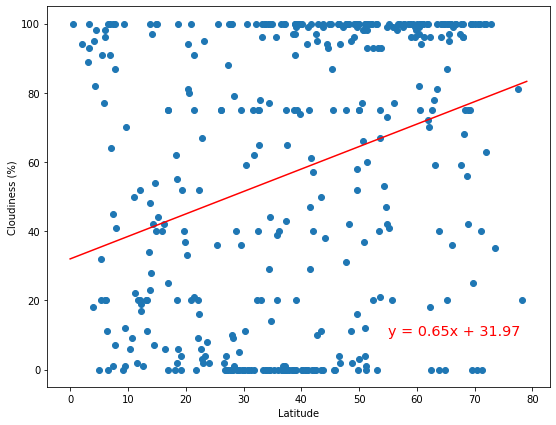

In [70]:
# Northern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemi_df["Lat"],
                                                           northern_hemi_df["Cloudiness"])
x = np.arange(0,80)
y = slope*x + intercept
print("The r-value is: " + str(rvalue))
m = str(round(slope,2))

plt.figure(figsize=(9,7))
plt.plot(x,y,'-r')
plt.scatter(northern_hemi_df["Lat"],northern_hemi_df["Cloudiness"])
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.text(55,10, "y = " + m +"x + " + str(round(intercept, 2)), fontsize = "x-large", color = "r")
plt.show()

The r-value is: 0.37395138667773054


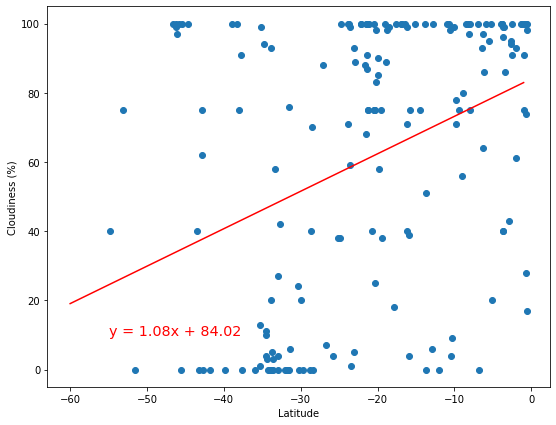

In [71]:
# Southern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemi_df["Lat"],
                                                           southern_hemi_df["Cloudiness"])
x = np.arange(-60,0)
y = slope*x + intercept
print("The r-value is: " + str(rvalue))
m = str(round(slope,2))

plt.figure(figsize=(9,7))
plt.plot(x,y,'-r')
plt.scatter(southern_hemi_df["Lat"],southern_hemi_df["Cloudiness"])
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.text(-55,10, "y = " + m +"x + " + str(round(intercept, 2)), fontsize = "x-large", color = "r")
plt.show()

**Discussion about the linear relationship:** The cloudiness for these graphs are all over the place. Many cities at a specific small range in latitudes are having blue bird days with clear skies above, while others at a very similar latitude are completely overcast. Specifically around 40 degrees latitude we see the extreme. However, even with such data points, the collective weight of other data points show a very, very weak correlation such that a lower latitude may suggest less cloudiness in general. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.04615459162056431


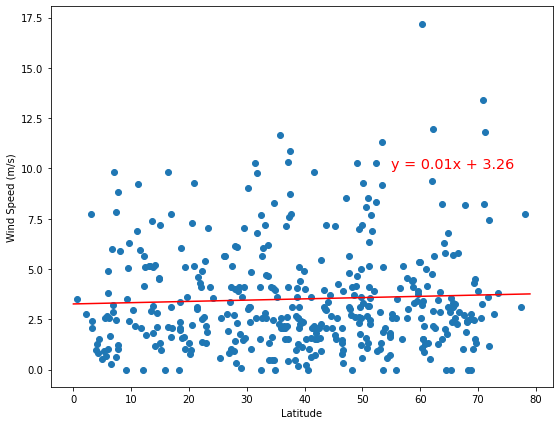

In [72]:
# Northern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemi_df["Lat"],
                                                           northern_hemi_df["Wind Speed"])
x = np.arange(0,80)
y = slope*x + intercept
print("The r-value is: " + str(rvalue))
m = str(round(slope,2))

plt.figure(figsize=(9,7))
plt.plot(x,y,'-r')
plt.scatter(northern_hemi_df["Lat"],northern_hemi_df["Wind Speed"])
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.text(55,10, "y = " + m +"x + " + str(round(intercept, 2)), fontsize = "x-large", color = "r")
plt.show()

The r-value is: -0.1877055564828598


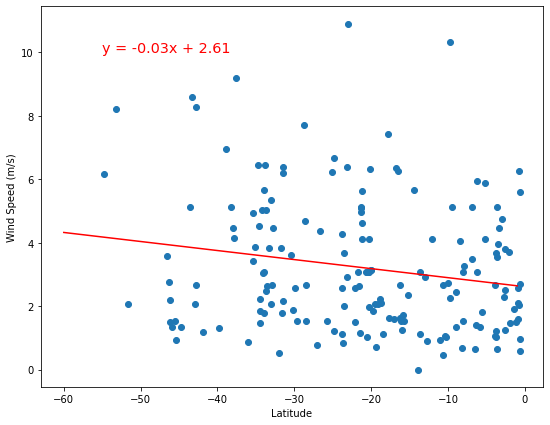

In [73]:
# Southern Hemisphere
# Southern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemi_df["Lat"],
                                                           southern_hemi_df["Wind Speed"])
x = np.arange(-60,0)
y = slope*x + intercept
print("The r-value is: " + str(rvalue))
m = str(round(slope,2))

plt.figure(figsize=(9,7))
plt.plot(x,y,'-r')
plt.scatter(southern_hemi_df["Lat"],southern_hemi_df["Wind Speed"])
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.text(-55,10, "y = " + m +"x + " + str(round(intercept, 2)), fontsize = "x-large", color = "r")
plt.show()

**Discussion about the linear relationship:** Interestingly, there is slightly more consistency in the Southern Hemisphere here, but that in general there is not much we can say about a linear relationship between a city's latitude and its projected wind speed with such small r-values.